# Titanic data analisys/ML

Importing libraries:

In [47]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [48]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [134]:
from IPython.display import HTML
style = "<style>svg{width: 40% !important; height: 50% !important;} </style>"
HTML(style)

Reading and presenting data:

In [50]:
titanic_data = pd.read_csv('train.csv')

In [51]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Checking for missing values:

In [52]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Creating float feature matrix X and float target vector y:

In [54]:
X = titanic_data.drop(['PassengerId', 'Name', 'Cabin', 'Survived', 'Ticket'], axis=1)
y = titanic_data.Survived

In [55]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Convert categorical variable into dummy/indicator variables:

In [56]:
X = pd.get_dummies(X)

In [57]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Getting rid of null values and replacing them with median value:

In [60]:
X  = X.fillna({'Age': X.Age.median()})

In [61]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [63]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [64]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

First result of analysis of the data. That is obvious that tree now is overtrained and it's aimed to the very precise case:

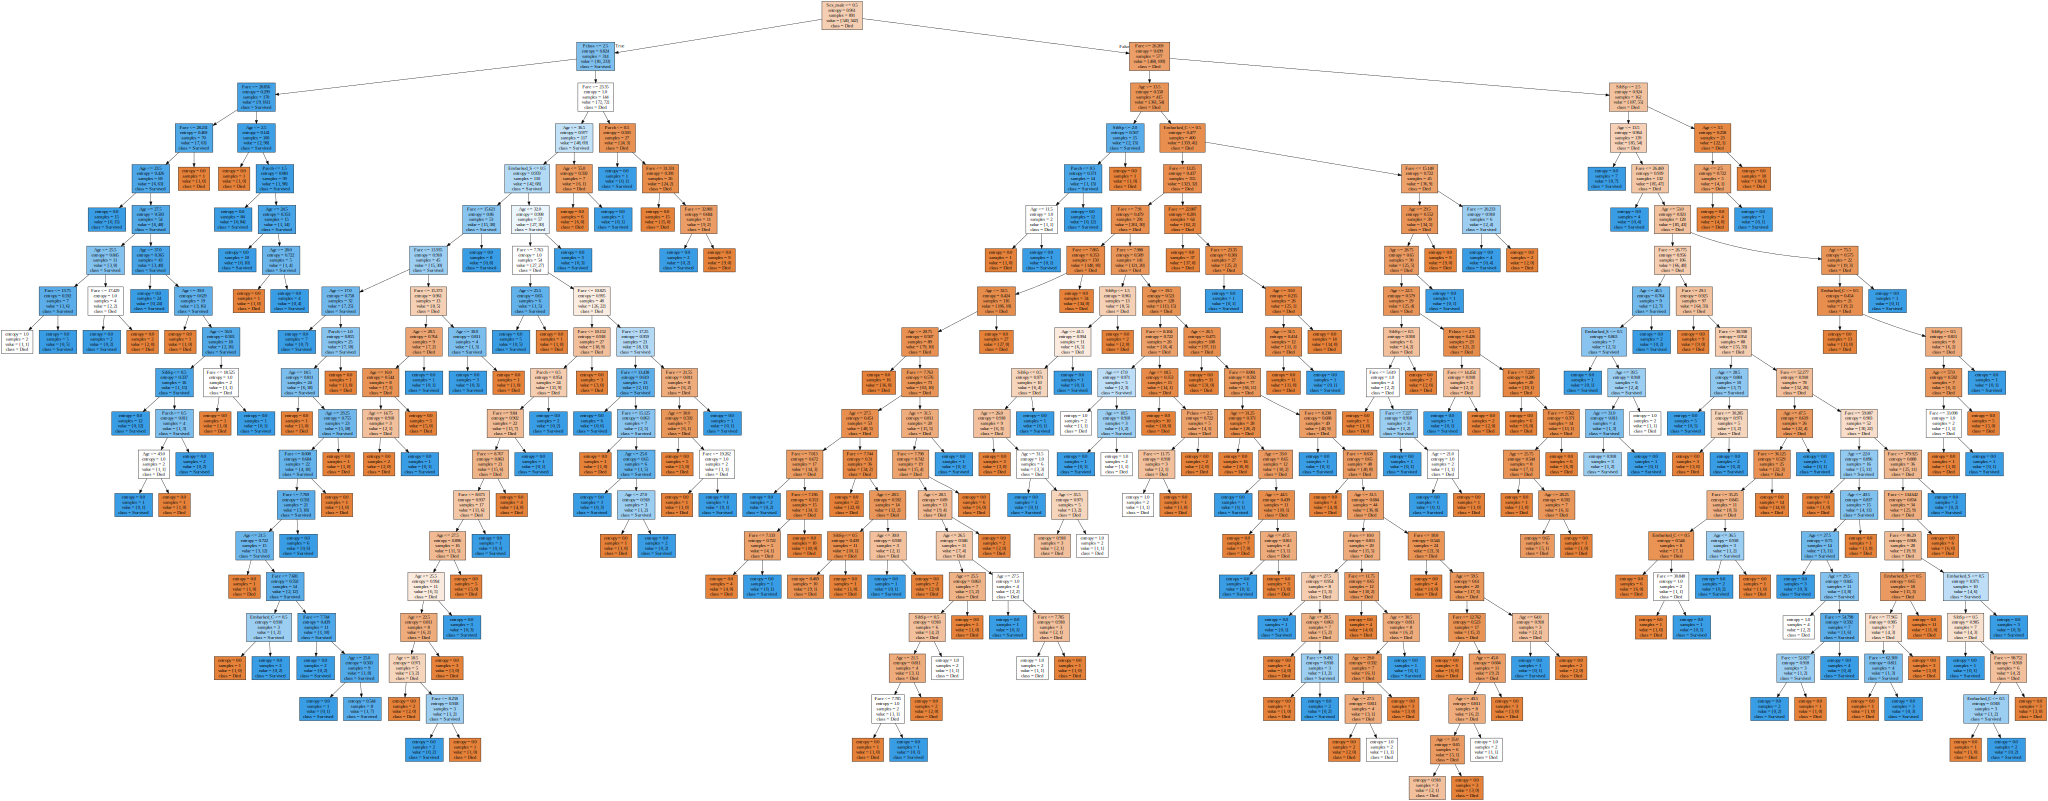

In [65]:
graph = Source(tree.export_graphviz(clf, out_file=None
                                   , feature_names=list(X), class_names=['Died', 'Survived']
                                   , filled=True))

display(SVG(graph.pipe(format='svg')))

In [68]:
X = pd.get_dummies(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [74]:
X  = X.fillna({'Age': X.Age.median()})

Applying simplified metrics of the quality

In [75]:
clf.score(X_train, y_train)

0.9798657718120806

In [76]:
clf.score(X_test, y_test)

0.7796610169491526

Reducting the depth of the tree in order to simplify the decision tree itself. This allowes to get the better score:

In [80]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [82]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [83]:
clf.score(X_train, y_train)

0.8238255033557047

In [84]:
clf.score(X_test, y_test)

0.8203389830508474

Making cross-validation in order to maimize error estimation:

In [85]:
max_depth_values = range(1, 100)

In [88]:
print(max_depth_values)

range(1, 100)


In [89]:
scores_data = pd.DataFrame()

In [90]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [91]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.798711


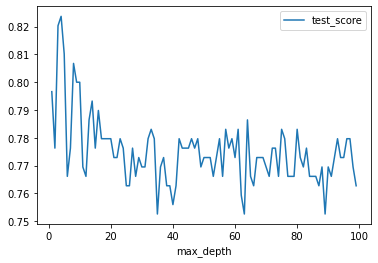

In [92]:
scores_data.plot(x='max_depth', y='test_score')

In [93]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type',
                          value_name='score')

Cross validation scroe vs tree depth table:

In [94]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [95]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.798711
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.797017
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.790266
207,10,cross_val_score,0.802031


It is obvious that the best depth is reached approximately around 10:

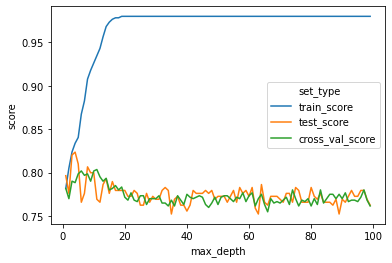

In [96]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [99]:
cross_val_score(clf, X_train, y_train, cv=5)  # array of precision

array([0.79166667, 0.84033613, 0.77310924, 0.78151261, 0.78991597])

In [100]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7936274509803921

In [101]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [102]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.8

Using GridSearchCV in order to get the best parameteres that can make result of prediction better:

In [103]:
clf = tree.DecisionTreeClassifier()

In [104]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [105]:
grid_seach_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [106]:
grid_seach_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [107]:
grid_seach_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [108]:
best_clf = grid_seach_cv_clf.best_estimator_

In [109]:
best_clf.score(X_test, y_test)

0.7762711864406779

In [110]:
y_pred = best_clf.predict(X_test)

In [111]:
precision_score(y_test, y_pred)

0.7596153846153846

In [112]:
recall_score(y_test, y_pred)

0.6583333333333333

In [113]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [114]:
y_predicted_prob

array([[0.42857143, 0.57142857],
       [0.5       , 0.5       ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

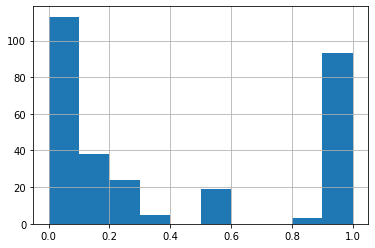

In [115]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [116]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [117]:
precision_score(y_test, y_pred)

0.8064516129032258

In [118]:
recall_score(y_test, y_pred)

0.625

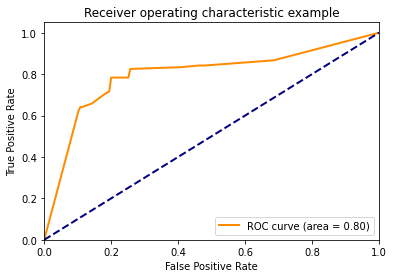

In [119]:
from sklearn.metrics import roc_curve, auc
lw = 2
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [120]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [121]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

### A simplified decision tree:

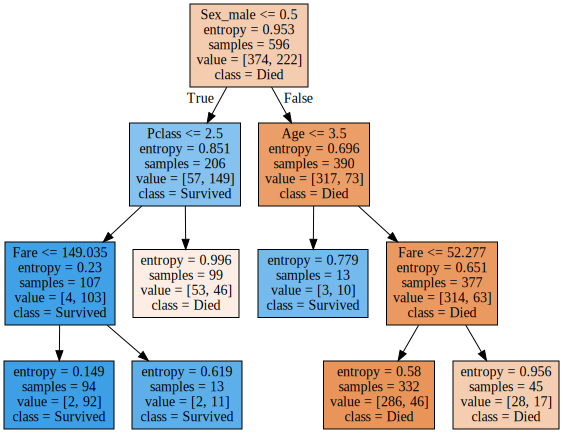

In [122]:
graph = Source(tree.export_graphviz(clf, out_file=None
                                   , feature_names=list(X), class_names=['Died', 'Survived']
                                   , filled=True))

display(SVG(graph.pipe(format='svg')))

In [123]:
clf_rf = RandomForestClassifier()

In [124]:
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10], 'min_samples_leaf': [2, 8, 5, 10, 15, 20, 30, 40, 50, 60]}

In [125]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [126]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'min_samples_leaf': [2, 8, 5, 10, 15, 20, 30, 40, 50,
                                              60],
                         'n_estimators': [10, 20, 30]})

In [127]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 20}

In [128]:
best_clf = grid_search_cv_clf.best_estimator_

In [129]:
best_clf.score(X_test, y_test)

0.8033898305084746

### Defining the importance of features for the "Survive" parameter of the dataset

In [130]:
best_clf.feature_importances_

array([0.11101418, 0.08177928, 0.04950838, 0.03379752, 0.15047931,
       0.2950092 , 0.22986788, 0.01849813, 0.00582768, 0.02421843])

In [131]:
feature_importances = best_clf.feature_importances_

In [132]:
feature_importances_df = pd.DataFrame({'features': list(X), 'feature_importances': feature_importances})

In [133]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.295009
6,Sex_male,0.229868
4,Fare,0.150479
0,Pclass,0.111014
1,Age,0.081779
2,SibSp,0.049508
3,Parch,0.033798
9,Embarked_S,0.024218
7,Embarked_C,0.018498
8,Embarked_Q,0.005828
